# Modelo del rendimiento de una cuenta de ahorro

<img style="center" src="https://static.pexels.com/photos/9660/business-money-pink-coins.jpg" width="500px" height="200px" alt="atom"/>

> **¿Tiene el dinero el mismo valor a lo largo del tiempo?** La respuesta es *no*. Todos lo hemos vivido. 

> Dos situaciones básicas:
1. <font color=blue>Inflación</font>: ¿Cuánto dinero necesitabas para comprar unas papas y un refresco hace 10 años? ¿Cuánto necesitas hoy?
2. <font color=blue>Interés</font>: no es lo mismo tener \$10000 MXN disponibles hoy a recibir \$10000 MXN en un año, pues los primeros pueden ser invertidos en un negocio o una cuenta bancaria para generar *interés*. Por lo tanto los \$10000 MXN disponibles hoy valen más que los \$10000 MXN que se recibirán en un año.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)

Referencias:
- http://www.sympy.org
- http://matplotlib.org
- http://www.numpy.org
- http://ipywidgets.readthedocs.io/en/latest/index.html

___
## Interés
Nos centraremos en como cambia el valor del dinero en el tiempo debido al **interés**. Existen dos tipos:

### Capitalización por interés simple
Este tipo de interés se calcula <font color=red>única y exclusivamente sobre la cantidad original que se invirtió</font>. Como consecuencia, el interés generado no forma parte del dinero que se invierte, es decir, los <font color=blue>intereses no ganan intereses</font>.

Suponga que se tiene un capital inicial $C_0$ y se invierte a un plazo de $k$ periodos (pueden ser meses, trimestres, semestres, años...) a una tasa de **interés simple** por periodo $i$. Al final del primer periodo, el capital $C_1$ que se obtiene es:

$$C_1=C_0+iC_0=C_0(1+i).$$

De la misma manera, como el interés solo se calcula sobre el capital inicial, al final del segundo periodo, el capital $C_2$ que se obtiene es:

$$C_2=C_1+iC_0=C_0+iC_0+iC_0=C_0(1+2i).$$

Así, al final del $k-$ésimo periodo, el capital $C_k$ que se obtiene es:

$$C_k=C_{k-1}+iC_0=C_0+kiC_0=C_0(1+ki).$$

> **Ejemplo.** Suponga que se tiene un capital de \$10000 MXN, el cual se pone en un fondo de inversión que paga una tasa de interés simple del 0.8% mensual. 

> Si se tiene una meta de ahorro de \$11000 MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

In [1]:
# Librería para cálculo numérico
import numpy as np

# Valores dados en el enunciado
C_0, meta, i = 10000, 11000, 0.008
# Despejamos k tal que C_k=meta
k = np.ceil((meta/C_0 - 1)/i)   # Notar el uso de la función ceil (no se puede tener un número no entero de periodos)
k = k.astype(int)               # Conversión a entero (para visualización)
C_k = C_0*(1+k*i)               # Cálculo del capital al final del periodo k
C_k = round(C_k, 2)             # Redondeo con dos cifras decimales

# Imprimimos respuesta en pantalla
print("El número de periodos que se debe dejar invertido el dinero es ", k,". Al final del periodo ", k,
      ", el capital es ", C_k, ".", sep="")

El número de periodos que se debe dejar invertido el dinero es 13. Al final del periodo 13, el capital es 11040.0.


> <font color=blue>**Actividad.**</font>
> - ¿Qué pasa si el interés no es del 0.8% mensual sino del 1% mensual?
> - ¿Qué pasa si la meta no son \$11000 MXN si no \$12000 MXN?

In [ ]:
# Solución

> Una gráfica que nos permite ilustrar la situación anterior se puede realizar de la siguiente manera.

In [2]:
# Librerías para gráficos
import matplotlib.pyplot as plt
# Para que se muestren las gráficas en la misma ventana
%matplotlib inline
# Librería para widgets de jupyter
from ipywidgets import *

def interes_simple(C_0, meta, i):
    # Despejamos k
    k = np.ceil((meta/C_0 - 1)/i)           # Notar el uso de la función ceil
    k = k.astype(int)                       # Conversión a entero
    C_k = C_0*(1+k*i)                       # Cálculo del capital al final del periodo k
    C_k = round(C_k, 2)                     # Redondeo con dos cifras decimales
    # Vector de periodos
    kk = np.linspace(0,k,k+1)               
    # Vector de capitales por periodo
    CC = C_0*(1+kk*i)
    # Gráfico
    plt.figure(num=1); plt.clf()            # Figura 1, borrar lo que contenga
    plt.plot(kk, CC,'*',linewidth=3.0)      # Se grafica la evolución de los capitales
    plt.plot(kk,meta*np.ones(k+1),'--k')    # Se grafica la meta
    plt.xlabel('k')                         # Etiqueta eje x
    plt.ylabel('C_k')                       # Etiqueta eje y
    plt.grid(True)                          # Malla en la gráfica
    plt.show()                              # Mostrar la figura
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")
    
interact_manual(interes_simple, C_0=fixed(10000), meta=(10000,12000,100), i=fixed(0.008));

interactive(children=(IntSlider(value=11000, description='meta', max=12000, min=10000, step=100), Button(descr…

Como se esperaba, el capital en el $k-$ésimo periodo $C_k=C_0(1+ki)$ crece linealmente con $k$.

### Capitalización por interés compuesto
El capital que genera el interés simple permanece constante todo el tiempo de duración de la inversión. En cambio, el que produce el interés compuesto en un periodo se <font color=red>convierte en capital en el siguiente periodo</font>. Esto es, el interés generado al final de un periodo <font color=blue>se reinvierte para el siguiente periodo para también producir interés</font>.

Suponga que se tiene un capital inicial $C_0$, y se va a ceder el uso de este capital por un periodo de tiempo determinado a una tasa de interés $i$. El capital que se obtiene al final del primer periodo $C_1$ se puede calcular por

$$C_1=C_0(1+i).$$ 

Si la anterior suma se vuelve a ceder a la misma tasa de interés, al final del periodo dos el capital $C_2$ es 

$$C_2=C_1(1+i)=C_0(1+i)^2.$$

Si se repite el anterior proceso $k$ veces, el capital al final del $k-$ésimo periodo $C_k$ es 

$$C_k=C_{k-1}(1+i)=C_0(1+i)^k.$$

**Referencia**:
- https://es.wikipedia.org/wiki/Inter%C3%A9s_compuesto.

> **Ejemplo.** Suponga que se tiene un capital de \$10000 MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del 0.8% mensual. 

> Si se tiene una meta de ahorro de \$11000 MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?

> Muestre una gráfica que ilustre la situación.

In [3]:
def interes_compuesto(C_0, meta, i):
    # Despejamos k
    k = np.ceil(np.log(meta/C_0)/np.log(1+i))
    k = k.astype(int)
    C_k = C_0*(1+i)**k                      # Cálculo del capital al final del periodo k
    #C_k = round(C_k,2)                      # Redondeo con dos cifras decimales
    # Vector de periodos
    kk = np.linspace(0,k,k+1)
    # Vector de capitales por periodo
    CC = C_0*(1+i)**kk
    # Gráfico
    plt.figure(num=1); plt.clf()            # Figura 1, borrar lo que contenga
    plt.plot(kk, CC,'*',linewidth=3.0)      # Se grafica la evolución de los capitales
    plt.plot(kk,meta*np.ones(k+1),'--k')    # Se grafica la meta
    plt.xlabel('k')                         # Etiqueta eje x
    plt.ylabel('C_k')                       # Etiqueta eje y
    plt.grid(True)                          # Malla en la gráfica
    plt.show()                              # Mostrar la figura
    print("El número de periodos que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", k,
          ". Al final del periodo ", k,", el capital es ", C_k, ".", sep="")
    
interact_manual(interes_compuesto, C_0=fixed(10000), meta=(10000,12000,100), i=fixed(0.008));

interactive(children=(IntSlider(value=11000, description='meta', max=12000, min=10000, step=100), Button(descr…

El capital en el $k-$ésimo periodo $C_k=C_0(1+i)^k$ crece de manera exponencial con $k$.

> <font color=blue>**Actividad.**</font>
> - Modificar el código anterior para dejar fija la meta de ahorro y variar la tasa de interés compuesta.

In [24]:
interact_manual(interes_compuesto, C_0=fixed(10000), meta=fixed(11000), i=(0.01,0.05,0.01));

interactive(children=(FloatSlider(value=0.02, description='i', max=0.05, min=0.01, step=0.01), Button(descript…

### Capitalización continua de intereses
La capitalización continua se considera un tipo de capitalización compuesta, en la que a cada instante de tiempo $t$ se se capitalizan los intereses. Es decir, la frecuencia de capitalización es infinita (o, equivalentemente, el periodo de capitalización tiende a cero).

Suponga que se tiene un capital inicial $C_0$, y que el capital acumulado en el tiempo $t$ es $C(t)$. Queremos saber cuanto será el capital pasado un periodo de tiempo $\Delta t$, dado que la tasa de interés efectiva para este periodo de tiempo es $i$. De acuerdo a lo anterior tenemos

$$C(t+\Delta t)=C(t)(1+i)=C(t)(1+r\Delta t),$$

donde $r=\frac{i}{\Delta t}$ es la tasa de interés instantánea. Manipulando la anterior expresión, obtenemos

$$\frac{C(t+\Delta t)-C(t)}{\Delta t}=r\; C(t).$$

Haciendo $\Delta t\to 0$, obtenemos la siguiente ecuación diferencial 

$$\frac{d C(t)}{dt}=r\; C(t),$$

sujeta a la condición inicial (monto o capital inicial) $C(0)=C_0$.

La anterior, es una ecuación diferencial lineal de primer orden, para la cual se puede calcular la *solución analítica*.

In [5]:
# Librería de cálculo simbólico
import sympy as sym

# Para imprimir en formato TeX
from sympy import init_printing; init_printing(use_latex='mathjax')

# Símbolos t(para el tiempo) y r(para el interés instantáneo)
#t, r = sym.symbols('t r')
# Otra forma de hacer lo anterior
sym.var('t r')

C = sym.Function('C')

In [6]:
eqn = sym.Eq(sym.Derivative(C(t),t) - r*C(t), 0) # Ecuación diferencial
display(eqn) # Mostrar ecuación
sym.dsolve(eqn, C(t)) # Resolver

          d           
-r⋅C(t) + ──(C(t)) = 0
          dt          

           r⋅t
C(t) = C₁⋅ℯ   

con $C_1=C_0$.

La equivalencia entre la tasa de interés compuesta $i$ y la tasa de interés instantánea $r$ viene dada por

$$e^r=1+i.$$

___
¿Cómo podemos calcular la *solución numérica*?

> **Ejemplo.** Suponga que se tiene un capital de \$10000 MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del 0.8% mensual. 

> Si se tiene una meta de ahorro de \$11000 MXN sin inversiones adicionales, ¿cuánto tiempo se debe dejar invertido el dinero?

> Muestre una gráfica que ilustre la situación.

In [5]:
# Librerías para integración numérica
from scipy.integrate import odeint

In [8]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

In [6]:
# Modelo de capitalización continua
def cap_continua(C, t, r):
    return r * C

In [7]:
def interes_continuo(C_0, meta, r):
    # Despejamos t
    t = np.log(meta/C_0)/r
    # Vector de periodos
    tt = np.linspace(0,t,100)
    # Vector de capitales por periodo
    CC = odeint(cap_continua, C_0, tt, args = (r,))
    # Gráfico
    plt.figure(num=1); plt.clf()                # Figura 1, borrar lo que contenga
    plt.plot(tt, CC,'-',linewidth=3.0)          # Se grafica la evolución de los capitales
    plt.plot(tt,meta*np.ones(len(tt)),'--k')    # Se grafica la meta
    plt.xlabel('t')                             # Etiqueta eje x
    plt.ylabel('C(t)')                          # Etiqueta eje y
    plt.grid(True)                              # Malla en la gráfica
    plt.show()                                  # Mostrar la figura
    print("El tiempo que se debe dejar invertido el dinero para llegar a la meta de ", meta," es ", t, " meses.", sep="")
    
interact_manual(interes_continuo, C_0=fixed(10000), meta=(10000,20000,100), r=fixed(np.log(1+i)));

interactive(children=(IntSlider(value=15000, description='meta', max=20000, min=10000, step=100), Button(descr…

### Actividad. 
1. Resolver con sympy la siguientes ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [9]:
import sympy as sym

In [10]:
sym.init_printing(use_latex='mathjax')

In [11]:
# Definimos variables
sym.var('t', real=True, positive=True)
x = sym.Function('x')
# Ecuacion diferencial
ode = sym.Eq(sym.Derivative(x(t),t)-x(t)/(t+1),0)
display(ode)

d           x(t)    
──(x(t)) - ───── = 0
dt         t + 1    

In [14]:
sym.dsolve(ode)

x(t) = C₁⋅(t + 1)

2. Obtener la solución numérica.

In [16]:
# Funcion a integrar
def func(x,t):
    return x/(t+1)

In [17]:
# Condicion inicial
x0 = 1
# Vector de tiempo
t = np.linspace(0,10,100)

In [19]:
# Solucion numerica
x = odeint(func, x0, t)

(0, 15)

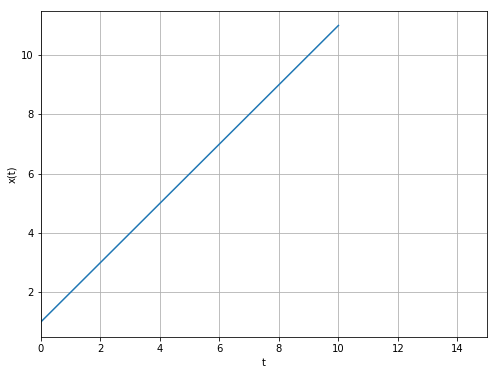

In [21]:
# Grafica x vs.t
plt.figure(figsize=(8,6))
plt.plot(t, x)
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim([0, 15])

3. Comparar.

(0, 15)

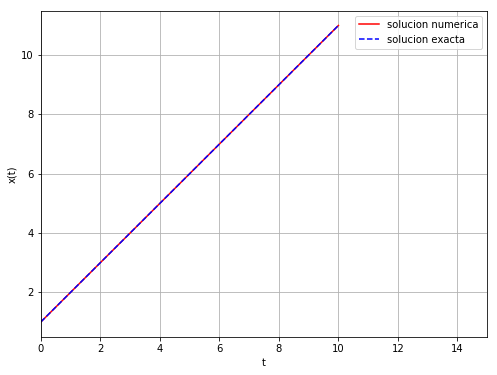

In [22]:
# Grafica x vs.t
plt.figure(figsize=(8,6))
plt.plot(t, x, 'r',label='solucion numerica')
plt.plot(t, t+1, 'b--', label='solucion exacta')
plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.xlim([0, 15])

___
## Tabla de abonos
Como aplicación importante del concepto de interés compuesto se encuentra la creación de un modelo de cuenta de ahorro.

Referencia:
- Vidaurri Aguirre, Héctor Manuel. *Ingeniería económica básica*, ISBN: 978-607-519-017-4. (Disponible en biblioteca)
- http://pbpython.com/amortization-model.html

In [26]:
# Librería de análisis de datos
import pandas as pd
# Librería para manipulación de fechas
from datetime import date

# Datos para la cuenta de ahorro
Tasa_interes = 0.08
Anos = 5
Abonos_ano = 12
Inicial = 50000
Meta = 50000
fecha_inicio = (date(2018,10,31))

# Cálculo de abonos mensuales iguales para llegar a la meta de ahorro en el tiempo deseado
Abono = (Tasa_interes/Abonos_ano)*(Meta - Inicial*(1+Tasa_interes/Abonos_ano)**(Anos*Abonos_ano))/((1+Tasa_interes/Abonos_ano)**(Anos*Abonos_ano)-1)

# Rango de fechas en la tabla
rng = pd.date_range(fecha_inicio, periods=Anos*Abonos_ano, freq='MS')
rng.name = "Fecha del abono"

# Columnas de abonos y extracto de cuenta en las fechas respectivas
df = pd.DataFrame(index=rng,columns=['Abono', 'Balance'], dtype='float')

# Para poner el indice con los periodos y no con las fechas
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Periodo"  # Columna correspondiente al periodo

# Los abonos son iguales
df["Abono"] = Abono

# Vector indizador de los periodos de los abonos
index_vector = np.arange(1,len(rng)+1)
# Extracto de la cuenta mes a mes
df["Balance"] = Inicial*(1+Tasa_interes/Abonos_ano)**index_vector+Abono*(((1+Tasa_interes/Abonos_ano)**index_vector-1)/(Tasa_interes/Abonos_ano))

# Redondear con dos cifras decimales
df = df.round(2)
df

# La siguiente solución es también válida. Sin embargo, evitar el uso de 'for'

#df.loc[1, "Balance"] = Inicial*(1+Tasa_interes/Abonos_ano)**1 + df.loc[1, "Abono"]

#for i in range(2, len(df)+1):
#    # Get the previous balance as well as current payments
#    prev_balance = df.loc[i-1, "Balance"]

#    df.loc[i, "Balance"] = prev_balance*(1+Tasa_interes/Abonos_ano)**1 + df.loc[i, "Abono"]

,Fecha del abono,Abono,Balance
Periodo,,,
1,2018-11-01,-333.33,50000.0
2,2018-12-01,-333.33,50000.0
3,2019-01-01,-333.33,50000.0
4,2019-02-01,-333.33,50000.0
5,2019-03-01,-333.33,50000.0
6,2019-04-01,-333.33,50000.0
7,2019-05-01,-333.33,50000.0
8,2019-06-01,-333.33,50000.0
9,2019-07-01,-333.33,50000.0


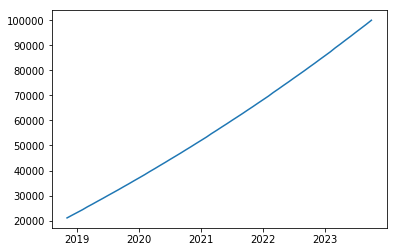

In [25]:
plt.plot(df['Fecha del abono'], df['Balance']);

> <font color=blue>**Tarea.**</font>
> - Averiguar tasas de interés reales en algún banco y proyectar un ahorro mensual para que al terminar su carrera tengan $50000 MXN en su cuenta.
> - Hacer esto en un nuevo archivo, llamarlo Tarea6_ApellidoNombre.ipynb y subirlo a moodle.
> - Plazo: Jueves a las 23:00.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>